In [19]:
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pickle.load( open( "2015-12-12-mlpexperiments_results6.p", "rb" ) )
df.shape

(50, 20)

In [12]:
df.head()

,cm_overall,epochs,network,pct_white,test_size,training_size,p_cm,P_cm,r_cm,R_cm,n_cm,N_cm,b_cm,B_cm,q_cm,Q_cm,k_cm,K_cm,white_cm,black_cm
1,"[[3157, 2091], [1815, 2937]]",1,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,100000,"[[357, 246], [59, 511]]","[[519, 117], [329, 294]]","[[179, 248], [121, 324]]","[[319, 159], [269, 255]]","[[150, 155], [93, 223]]","[[326, 77], [254, 140]]","[[152, 154], [98, 204]]","[[313, 74], [274, 118]]","[[155, 213], [51, 298]]","[[325, 91], [289, 181]]","[[126, 162], [86, 198]]","[[236, 119], [168, 191]]","[[2038, 637], [1583, 1179]]","[[1119, 1178], [508, 1758]]"
1,"[[3030, 1726], [1942, 3302]]",1,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,100000,"[[440, 163], [151, 419]]","[[354, 282], [93, 530]]","[[232, 195], [205, 240]]","[[298, 180], [215, 309]]","[[195, 110], [132, 184]]","[[239, 164], [110, 284]]","[[191, 115], [135, 167]]","[[235, 152], [133, 259]]","[[227, 141], [113, 236]]","[[232, 184], [143, 327]]","[[167, 121], [134, 150]]","[[220, 135], [162, 197]]","[[1578, 1097], [856, 1906]]","[[1452, 845], [870, 1396]]"
1,"[[4131, 3462], [841, 1566]]",1,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,100000,"[[581, 22], [492, 78]]","[[511, 125], [270, 353]]","[[371, 56], [383, 62]]","[[317, 161], [282, 242]]","[[296, 9], [302, 14]]","[[327, 76], [237, 157]]","[[285, 21], [285, 17]]","[[295, 92], [244, 148]]","[[347, 21], [318, 31]]","[[315, 101], [248, 222]]","[[238, 50], [225, 59]]","[[248, 107], [176, 183]]","[[2013, 662], [1457, 1305]]","[[2118, 179], [2005, 261]]"
1,"[[3276, 2124], [1696, 2904]]",1,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,100000,"[[521, 82], [321, 249]]","[[353, 283], [74, 549]]","[[316, 111], [314, 131]]","[[242, 236], [164, 360]]","[[260, 45], [233, 83]]","[[224, 179], [98, 296]]","[[247, 59], [233, 69]]","[[211, 176], [104, 288]]","[[289, 79], [205, 144]]","[[203, 213], [101, 369]]","[[211, 77], [174, 110]]","[[199, 156], [103, 256]]","[[1432, 1243], [644, 2118]]","[[1844, 453], [1480, 786]]"
1,"[[2494, 1465], [2478, 3563]]",1,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,100000,"[[161, 442], [18, 552]]","[[483, 153], [230, 393]]","[[120, 307], [98, 347]]","[[287, 191], [237, 287]]","[[74, 231], [17, 299]]","[[290, 113], [201, 193]]","[[90, 216], [33, 269]]","[[277, 110], [220, 172]]","[[118, 250], [36, 313]]","[[280, 136], [179, 291]]","[[94, 194], [60, 224]]","[[220, 135], [136, 223]]","[[1837, 838], [1203, 1559]]","[[657, 1640], [262, 2004]]"


In [13]:
#methods to decode serialized network json
import json

def get_num_layers(json_str):
    # number of actual layers - 5 for input and output / 3 for each hidden + 2 for input and output
    return (len(json.loads(json_str)['layers']) - 5) / 3 + 2

def get_first_activation(json_str):
    return json.loads(json_str)['layers'][1]['activation']

def get_first_width(json_str):
    return json.loads(json_str)['layers'][0]['output_dim']

In [14]:
#convert confusion matrices to accuracy
def cm2accuracy(cm):
    return (cm[0][0] + cm[1][1] * 1.0) / sum([sum(a) for a in cm])
    
df['overall_acc'] = df['cm_overall'].apply(cm2accuracy)
df['width'] = df['network'].apply(get_first_width)
df['num_layers'] = df['network'].apply(get_num_layers)

In [15]:
df.head()

,cm_overall,epochs,network,pct_white,test_size,training_size,p_cm,P_cm,r_cm,R_cm,...,B_cm,q_cm,Q_cm,k_cm,K_cm,white_cm,black_cm,overall_acc,width,num_layers
1,"[[3157, 2091], [1815, 2937]]",1,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,100000,"[[357, 246], [59, 511]]","[[519, 117], [329, 294]]","[[179, 248], [121, 324]]","[[319, 159], [269, 255]]",...,"[[313, 74], [274, 118]]","[[155, 213], [51, 298]]","[[325, 91], [289, 181]]","[[126, 162], [86, 198]]","[[236, 119], [168, 191]]","[[2038, 637], [1583, 1179]]","[[1119, 1178], [508, 1758]]",0.6094,512,3
1,"[[3030, 1726], [1942, 3302]]",1,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,100000,"[[440, 163], [151, 419]]","[[354, 282], [93, 530]]","[[232, 195], [205, 240]]","[[298, 180], [215, 309]]",...,"[[235, 152], [133, 259]]","[[227, 141], [113, 236]]","[[232, 184], [143, 327]]","[[167, 121], [134, 150]]","[[220, 135], [162, 197]]","[[1578, 1097], [856, 1906]]","[[1452, 845], [870, 1396]]",0.6332,512,3
1,"[[4131, 3462], [841, 1566]]",1,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,100000,"[[581, 22], [492, 78]]","[[511, 125], [270, 353]]","[[371, 56], [383, 62]]","[[317, 161], [282, 242]]",...,"[[295, 92], [244, 148]]","[[347, 21], [318, 31]]","[[315, 101], [248, 222]]","[[238, 50], [225, 59]]","[[248, 107], [176, 183]]","[[2013, 662], [1457, 1305]]","[[2118, 179], [2005, 261]]",0.5697,512,3
1,"[[3276, 2124], [1696, 2904]]",1,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,100000,"[[521, 82], [321, 249]]","[[353, 283], [74, 549]]","[[316, 111], [314, 131]]","[[242, 236], [164, 360]]",...,"[[211, 176], [104, 288]]","[[289, 79], [205, 144]]","[[203, 213], [101, 369]]","[[211, 77], [174, 110]]","[[199, 156], [103, 256]]","[[1432, 1243], [644, 2118]]","[[1844, 453], [1480, 786]]",0.6180,512,3
1,"[[2494, 1465], [2478, 3563]]",1,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,100000,"[[161, 442], [18, 552]]","[[483, 153], [230, 393]]","[[120, 307], [98, 347]]","[[287, 191], [237, 287]]",...,"[[277, 110], [220, 172]]","[[118, 250], [36, 313]]","[[280, 136], [179, 291]]","[[94, 194], [60, 224]]","[[220, 135], [136, 223]]","[[1837, 838], [1203, 1559]]","[[657, 1640], [262, 2004]]",0.6057,512,3


(0.0, 1.0)

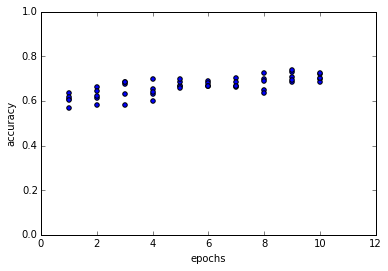

In [16]:
x = df['epochs']
y = df['overall_acc']
plt.scatter(x,y)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim((0.0,1.0))

In [24]:
acc_mean = df.groupby(['epochs']).apply(np.mean)['overall_acc']
acc_std = df.groupby(['epochs']).apply(np.std)['overall_acc']
print(acc_std)
print(acc_mean)

epochs
1     0.021005
2     0.027110
3     0.040957
4     0.031917
5     0.014725
6     0.008749
7     0.014714
8     0.033315
9     0.021018
10    0.015690
Name: overall_acc, dtype: float64
epochs
1     0.60720
2     0.62432
3     0.65072
4     0.64384
5     0.67554
6     0.67440
7     0.67650
8     0.67976
9     0.71100
10    0.70580
Name: overall_acc, dtype: float64


[None, None, None, None, None, None, None, None, None, None]

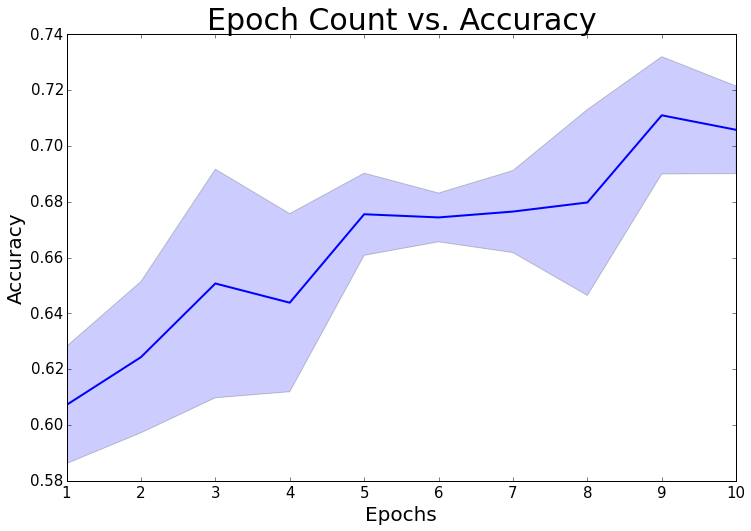

In [43]:
# plot it!
fig, ax = plt.subplots(1, figsize=(12,8))
ax.plot(list(acc_mean.index), acc_mean, lw=2, color='blue')
ax.fill_between(list(acc_mean.index), acc_mean+acc_std, acc_mean-acc_std, facecolor='blue', alpha=0.2)
ax.set_xlabel('Epochs', fontsize=20)
ax.set_ylabel("Accuracy", fontsize=20)
ax.set_title("Epoch Count vs. Accuracy", fontsize=30)
plt.setp(ax.get_xticklabels(), fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=15)